### Task 1

In [852]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     X, y = load_boston(return_X_y=True)


In [853]:
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1) # adding a column of ones to X to account for the intercept (bias term)

### Task 2 & 3 - Linear Regression 

Weights (including intercept): [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]


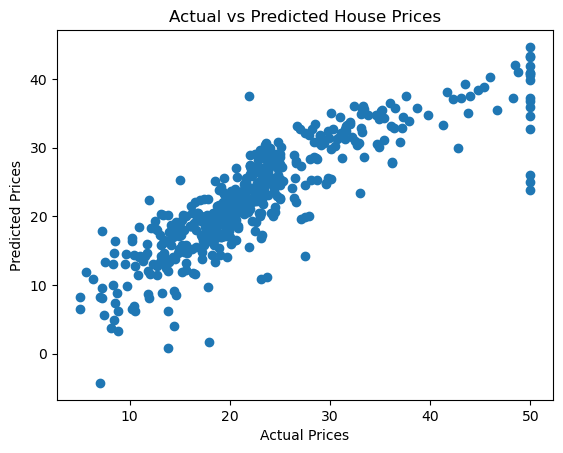

In [854]:
def closed_form_solution(X, y): # w = (X^T X)^-1 X^T y
    X_transpose = X.T
    w = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    return w

weights = closed_form_solution(X, y)


print("Weights (including intercept):", weights)

y_pred = X.dot(weights)

plt.scatter(y, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

### K-Fold validation

In [855]:
# MSE
def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [856]:
def k_fold_cross_validation(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    train_scores = []
    test_scores = []
    
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        weights = closed_form_solution(X_train, y_train) # fit the model
        
        #Predictions
        y_train_pred = X_train.dot(weights)
        y_test_pred = X_test.dot(weights)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        train_scores.append(train_mse)
        test_scores.append(test_mse)
        
        print(f"Fold {fold}: Training MSE = {train_mse}, Test MSE = {test_mse}")
    
    avg_train_score = np.mean(train_scores)
    avg_test_score = np.mean(test_scores)
    
    print(f"\nAverage Training MSE over {k} folds: {avg_train_score}")
    print(f"Average Test MSE over {k} folds: {avg_test_score}")
    
    return avg_train_score, avg_test_score

k = 5
avg_train_score, avg_test_score = k_fold_cross_validation(X, y, k)


Fold 1: Training MSE = 21.641412753226312, Test MSE = 24.291119474972625
Fold 2: Training MSE = 22.41844913717269, Test MSE = 20.867900937377964
Fold 3: Training MSE = 20.942796226720603, Test MSE = 26.39596868928046
Fold 4: Training MSE = 21.717960208252904, Test MSE = 23.40122507616358
Fold 5: Training MSE = 21.885520787285657, Test MSE = 22.486764212048005

Average Training MSE over 5 folds: 21.721227822531635
Average Test MSE over 5 folds: 23.488595677968526


### Task 4 - Ridge Regression

In [857]:
def ridge_closed_form_solution(X_train, y_train, lambda_value):
    n, d = X_train.shape
    identity_matrix = np.eye(d)
    identity_matrix[0, 0] = 0  # Do not regularize the intercept term
    w = np.linalg.inv(X_train.T.dot(X_train) + lambda_value * identity_matrix).dot(X_train.T).dot(y_train) # closed form solution
    return w

def k_fold_cross_validation_ridge(X, y, lambdas, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    avg_test_mse_per_lambda = []
    
    for lambda_value in lambdas:
        test_scores = []
        
        for train_index, test_index in kf.split(X):
            
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            
            weights = ridge_closed_form_solution(X_train, y_train, lambda_value) # fit the model using closed-form solution
                
         
            y_test_pred = X_test.dot(weights)
            
            
            test_mse = mean_squared_error(y_test, y_test_pred)
            
            
            test_scores.append(test_mse)
        
        avg_test_score = np.mean(test_scores)
        avg_test_mse_per_lambda.append(avg_test_score)
        
        print(f"Lambda = {lambda_value}: Average Test MSE = {avg_test_score}")
    
    return avg_test_mse_per_lambda

# lambdas from 10 to 10^7
lambdas = np.logspace(1, 7, num=13)

avg_test_mse_per_lambda = k_fold_cross_validation_ridge(X, y, lambdas, k=5)

best_lambda_index = np.argmin(avg_test_mse_per_lambda)
best_lambda = lambdas[best_lambda_index]
best_mse = avg_test_mse_per_lambda[best_lambda_index]

print(f"\nBest lambda: {best_lambda} with Average Test MSE: {best_mse}")

Lambda = 10.0: Average Test MSE = 24.299855573642514
Lambda = 31.622776601683793: Average Test MSE = 24.605179111922634
Lambda = 100.0: Average Test MSE = 25.454598988590668
Lambda = 316.22776601683796: Average Test MSE = 27.118311622606427
Lambda = 1000.0: Average Test MSE = 29.489098085087257
Lambda = 3162.2776601683795: Average Test MSE = 33.13101881463036
Lambda = 10000.0: Average Test MSE = 39.435982231259096
Lambda = 31622.776601683792: Average Test MSE = 48.43514891399561
Lambda = 100000.0: Average Test MSE = 55.69528043163607
Lambda = 316227.7660168379: Average Test MSE = 59.82174266173915
Lambda = 1000000.0: Average Test MSE = 62.442796314272734
Lambda = 3162277.6601683795: Average Test MSE = 64.60035328558027
Lambda = 10000000.0: Average Test MSE = 68.40029755532959

Best lambda: 10.0 with Average Test MSE: 24.299855573642514


### Task 5 - K-Fold validation of Ridge Regression (finding the best lambda)

In [858]:
def estimate_performance_best_lambda(X, y, best_lambda, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    train_scores = []
    test_scores = []
    
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        weights = ridge_closed_form_solution(X_train, y_train, best_lambda)
        
        
        y_train_pred = X_train.dot(weights)
        y_test_pred = X_test.dot(weights)
        
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        
        train_scores.append(train_mse)
        test_scores.append(test_mse)
        
        
        print(f"Fold {fold}: Training MSE = {train_mse}, Test MSE = {test_mse}")
    
    avg_train_score = np.mean(train_scores)
    avg_test_score = np.mean(test_scores)
    
    print(f"\nAverage Training MSE over {k} folds: {avg_train_score}")
    print(f"Average Test MSE over {k} folds: {avg_test_score}")
    
    return avg_train_score, avg_test_score


best_lambda = 10  # can be changed based on what you got in the previous step

estimate_performance_best_lambda(X, y, best_lambda, k=5)

Fold 1: Training MSE = 22.43517179546331, Test MSE = 24.648347618696924
Fold 2: Training MSE = 23.057344884554087, Test MSE = 22.780100594508927
Fold 3: Training MSE = 21.9156541407055, Test MSE = 26.121752286429253
Fold 4: Training MSE = 22.62443779026629, Test MSE = 24.223136081888175
Fold 5: Training MSE = 22.66845248425437, Test MSE = 23.725941286689295

Average Training MSE over 5 folds: 22.540212219048712
Average Test MSE over 5 folds: 24.299855573642514


(22.540212219048712, 24.299855573642514)

### Task 6 - Polynomial Transformation & repeated Ridge Regression

In [859]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  

In [860]:
estimate_performance_best_lambda(X_poly, y, best_lambda, k=5)

Fold 1: Training MSE = 6.0582224635369695, Test MSE = 14.864206880587664
Fold 2: Training MSE = 6.6244871927193865, Test MSE = 11.31087322616923
Fold 3: Training MSE = 6.370181687807612, Test MSE = 22.07215556110749
Fold 4: Training MSE = 6.775809696519211, Test MSE = 9.880579900267165
Fold 5: Training MSE = 6.78117549102144, Test MSE = 11.906829103126157

Average Training MSE over 5 folds: 6.521975306320924
Average Test MSE over 5 folds: 14.006928934251542


(6.521975306320924, 14.006928934251542)

### Task 7 - Multivariate Linear Regression using Gradient Descent

Iteration 0, Cost: 296.0734584980237
Iteration 100, Cost: 51.64118502708031


Iteration 200, Cost: 44.82900219807906
Iteration 300, Cost: 42.11984775541123
Iteration 400, Cost: 41.01272745993398
Iteration 500, Cost: 40.53177557625117
Iteration 600, Cost: 40.296119043353556
Iteration 700, Cost: 40.1570913525446
Iteration 800, Cost: 40.0566491972239
Iteration 900, Cost: 39.97211718929709
Iteration 1000, Cost: 39.89462354232116
Iteration 1100, Cost: 39.82068421632821
Iteration 1200, Cost: 39.74891846952046
Iteration 1300, Cost: 39.67876702763205
Iteration 1400, Cost: 39.609991808831545
Iteration 1500, Cost: 39.542480664310446
Iteration 1600, Cost: 39.47617115692099
Iteration 1700, Cost: 39.41102079697397
Iteration 1800, Cost: 39.346995409276445
Iteration 1900, Cost: 39.28406457672934
Iteration 2000, Cost: 39.22219984619439
Iteration 2100, Cost: 39.16137401289001
Iteration 2200, Cost: 39.10156082619162
Iteration 2300, Cost: 39.04273486036742
Iteration 2400, Cost: 38.98487145014235
Iteration 2500, Cost: 38.92794665200751
Iteration 2600, Cost: 38.87193721600768
Iterat

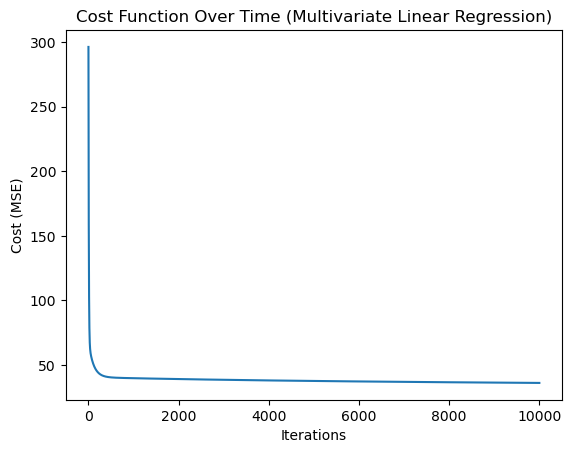

Final Weights (including intercept): [ 0.00139722 -0.01699495  0.07772534 -0.01199813  0.00079774  0.00045027
  0.01624797  0.01280261  0.00565651 -0.00177676  0.00108264  0.01141721
  0.05649103 -0.04427607]
Task 7 - Final MSE: 72.49295108439202


In [861]:
def gradient_descent_linear(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    m = y.size

    for i in range(iterations):
        y_pred = X.dot(theta)
        gradient = -(2/m) * X.T.dot(y - y_pred)  
        theta -= alpha * gradient
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        cost_history[i] = cost

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return theta, cost_history

alpha = 0.0000001  
iterations = 10000
theta = np.zeros(X.shape[1])

theta, cost_history = gradient_descent_linear(X, y, theta, alpha, iterations)

plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Over Time (Multivariate Linear Regression)')
plt.show()

print(f"Final Weights (including intercept): {theta}")


y_pred = X.dot(theta)
mse_task_7 = np.mean((y - y_pred) ** 2)
print(f"Task 7 - Final MSE: {mse_task_7}")


### Task 8 - Lasso Regression using Gradient Descent

Iteration 0, Cost: 296.0734642384759
Iteration 100, Cost: 39.893930915685274
Iteration 200, Cost: 39.2217792154719
Iteration 300, Cost: 38.65612083293091
Iteration 400, Cost: 38.17186379274324
Iteration 500, Cost: 37.751626735157146
Iteration 600, Cost: 37.38229924716603
Iteration 700, Cost: 37.053914538642026
Iteration 800, Cost: 36.75883026071478
Iteration 900, Cost: 36.49113183223786


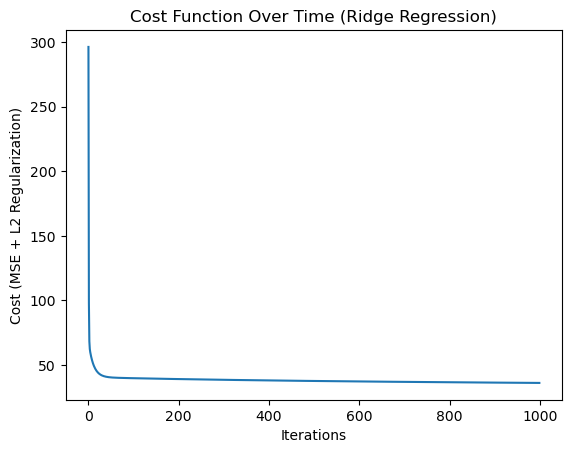

Final Weights (including intercept): [ 0.00139725 -0.01699561  0.07774248 -0.01199956  0.00079774  0.00045027
  0.01624831  0.01280056  0.00565736 -0.00177726  0.00108339  0.01141724
  0.05649014 -0.04427723]
Task 8 - Final MSE: 72.49214858266173


In [862]:
def ridge_gradient(X, y, y_pred, theta, a2):
    m = y.size
    gradient = -(2/m) * X.T.dot(y - y_pred) + 2 * a2 * theta  # L2 regularization (Ridge)
    return gradient

def gradient_descent_ridge(X, y, theta, alpha, a2, iterations):
    cost_history = np.zeros(iterations)
    m = y.size

    for i in range(iterations):
        y_pred = X.dot(theta)
        gradient = ridge_gradient(X, y, y_pred, theta, a2)
        theta -= alpha * gradient
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2) + a2 * np.sum(theta ** 2)
        cost_history[i] = cost

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return theta, cost_history

alpha = 0.000001  # Learning rate
a2 = 0.01  # Regularization strength for L2
iterations = 1000
theta = np.zeros(X.shape[1])

theta, cost_history = gradient_descent_ridge(X, y, theta, alpha, a2, iterations)

plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE + L2 Regularization)')
plt.title('Cost Function Over Time (Ridge Regression)')
plt.show()

print(f"Final Weights (including intercept): {theta}")


y_pred = X.dot(theta)
mse_task_8 = np.mean((y - y_pred) ** 2)
print(f"Task 8 - Final MSE: {mse_task_8}")


### Task 9 - Elastic Net using Gradient Descent 

Iteration 0, Cost: 296.0738602211192
Iteration 100, Cost: 51.64893428826995
Iteration 200, Cost: 44.83773759699063
Iteration 300, Cost: 42.12938183835177
Iteration 400, Cost: 41.022867095939915
Iteration 500, Cost: 40.54240750096773
Iteration 600, Cost: 40.30717826275407
Iteration 700, Cost: 40.16854059306033
Iteration 800, Cost: 40.06848773890023
Iteration 900, Cost: 39.98436134111861


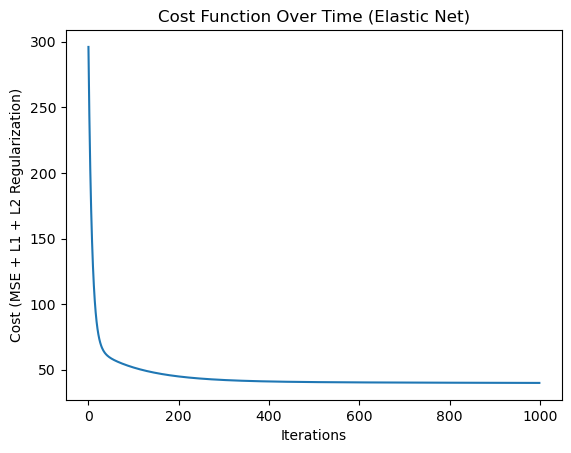

Final Weights (including intercept): [ 2.33915297e-04 -2.82183747e-03  1.47089418e-02 -1.73435469e-03
  7.81550118e-05  6.53765835e-05  2.35941085e-03  2.54171283e-03
  1.44101296e-03 -1.27780857e-03 -4.02048561e-04  2.70480505e-03
  6.08660834e-02 -4.62186066e-03]
Task 9 - Final MSE: 79.7913119039927


In [863]:
def elastic_gradient(X, y, y_pred, theta, a1, a2):
    m = y.size
    return -(2/m) * X.T.dot(y - y_pred) + 2 * a2 * theta + a1 * np.sign(theta)

def gradient_descent_elastic_net(X, y, theta, alpha, a1, a2, iterations):
    cost_history = np.zeros(iterations)
    m = y.size

    for i in range(iterations):
        y_pred = X.dot(theta)
        gradient = elastic_gradient(X, y, y_pred, theta, a1, a2)
        theta -= alpha * gradient
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2) + a1 * np.sum(np.abs(theta)) + a2 * np.sum(theta ** 2)
        cost_history[i] = cost

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return theta, cost_history

alpha = 0.0000001 
a1 = 0.1  # L1 regularization strength (Lasso)
a2 = 0.5  # L2 regularization strength (Ridge)
iterations = 1000
theta = np.zeros(X.shape[1])

theta, cost_history = gradient_descent_elastic_net(X, y, theta, alpha, a1, a2, iterations)

plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE + L1 + L2 Regularization)')
plt.title('Cost Function Over Time (Elastic Net)')
plt.show()

print(f"Final Weights (including intercept): {theta}")

y_pred = X.dot(theta)
mse_task_9 = np.mean((y - y_pred) ** 2)
print(f"Task 9 - Final MSE: {mse_task_9}")



### Task 10 - Theoretical Question

Elastic Net is a relatively optimal model to predict future housing prices because it combines both L1 (Lasso) and L2 (Ridge) regularization, providing a balance between feature selection and coefficient shrinkage to reduce overfitting. Elastic Net is especially effective in managing multicollinearity, which is common in housing data, by stabilizing coefficients while eliminating irrelevant features. The model parameters would include a learning rate of 0.0000001, 10000 iterations for gradient descent, and regularization terms such as an L1 (alpha1) of 0.1 and an L2 (alpha2) of 0.5.